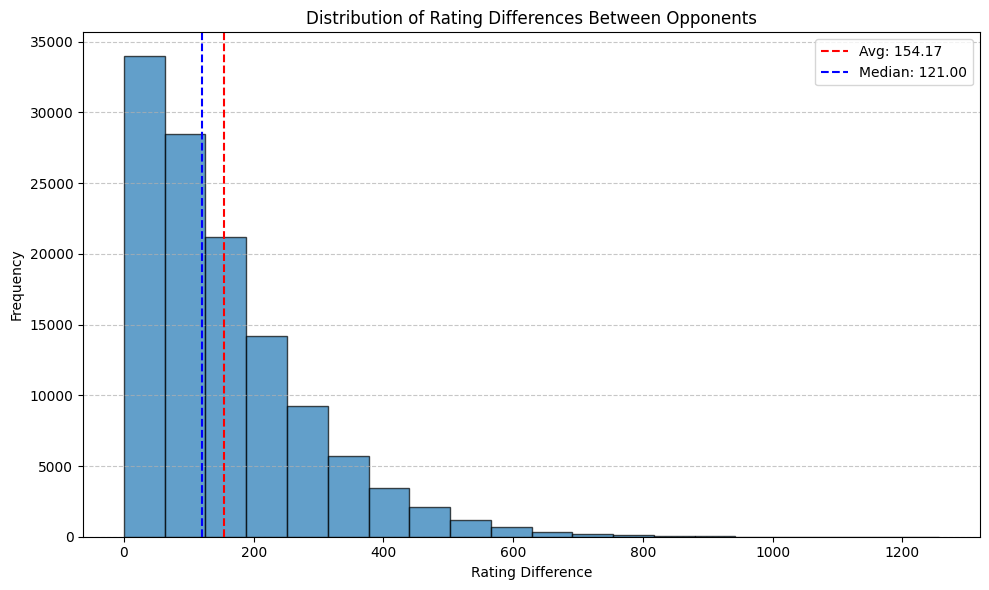

Average Rating Difference: 154.17
Median Rating Difference: 121.00


In [3]:
import re
import matplotlib.pyplot as plt

# Function to parse a single game's ratings
def parse_ratings(game):
    ratings = re.findall(r'\[WhiteElo "(\d+)"\]\s*\[BlackElo "(\d+)"\]', game)
    if ratings:
        white_rating, black_rating = map(int, ratings[0])
        return white_rating, black_rating
    return None, None

# Read and parse the PGN file
with open("../data/original_lichess.pgn", "r") as file:
    pgn_data = file.read()


# Split the file into individual games
games = pgn_data.strip().split("\n\n")

# Process each game to calculate rating differences
rating_differences = []
for game in games:
    ratings = parse_ratings(game)
    if ratings and ratings[0] is not None and ratings[1] is not None:
        white_rating, black_rating = ratings
        rating_differences.append(abs(white_rating - black_rating))

# Calculate statistics
average_rating_difference = sum(rating_differences) / len(rating_differences) if rating_differences else 0
median_rating_difference = sorted(rating_differences)[len(rating_differences) // 2] if rating_differences else 0

# Visualize the distribution of rating differences
plt.figure(figsize=(10, 6))
plt.hist(rating_differences, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(average_rating_difference, color='red', linestyle='dashed', linewidth=1.5, label=f'Avg: {average_rating_difference:.2f}')
plt.axvline(median_rating_difference, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_rating_difference:.2f}')
plt.title('Distribution of Rating Differences Between Opponents')
plt.xlabel('Rating Difference')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print insights
print(f"Average Rating Difference: {average_rating_difference:.2f}")
print(f"Median Rating Difference: {median_rating_difference:.2f}")
